In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
Ns = 10000
n = 16
y = np.random.randint(n, size=Ns)


In [3]:
mod_dict = np.array([
    [-3, 3], [-3, 1], [-3, -3], [-3, -1],
    [-1, 3], [-1, 1], [-1, -3], [-1, -1],
    [3, 3], [3, 1], [3, -3], [3, -1],
    [1, 3], [1, 1], [1, -3], [1, -1]
])


In [4]:
signal = mod_dict[y]


In [5]:
noise = np.random.normal(scale=np.sqrt(0.1), size=signal.shape)
X = signal + noise


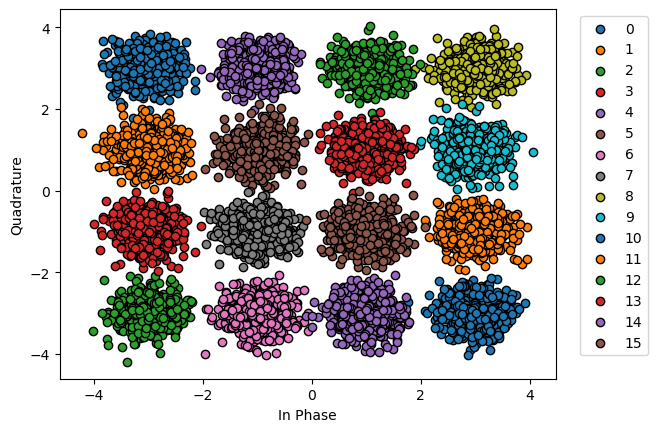

In [6]:
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=i, edgecolors='k')
plt.legend(bbox_to_anchor=(1.2, 1))
plt.xlabel('In Phase')
plt.ylabel('Quadrature')
plt.show()


### ANN Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

hist = model.fit(X_train, y_train, epochs=10, batch_size=64)


Epoch 1/10
125/125 [==============================] - 1s 2ms/step - loss: 1.4459 - accuracy: 0.6009
Epoch 2/10
125/125 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.8789
Epoch 3/10
125/125 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9780
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9915
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9931
Epoch 6/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0344 - accuracy: 0.9925
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9940
Epoch 8/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9936
Epoch 9/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9936
Epoch 10/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9939

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


63/63 [==============================] - 0s 1ms/step - loss: 0.0184 - accuracy: 0.9940
Accuracy: 99.40
